# Ensemble Learning

***Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.***

***there are two main type of ensemble learning***

**1 :- Bagging**

***2 :- Boosting***

# Basic Ensemble Techniques

***max voting***

***Averaging***

***Weighted Average***

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.datasets import make_moons

x , y = make_moons(n_samples=500, noise=0.5)

In [32]:
x , y

(array([[ 1.84062818e-01,  6.33664205e-01],
        [-8.91685061e-01,  1.05059744e+00],
        [ 1.59286968e+00,  7.41460390e-01],
        [ 1.80660112e-01,  1.44553802e+00],
        [ 4.89386562e-01, -9.40838615e-01],
        [ 1.05624872e+00,  2.38666925e-01],
        [ 1.13112856e+00, -6.10124161e-01],
        [ 1.97034519e+00, -7.38348596e-01],
        [-1.23818809e+00, -4.38898750e-02],
        [ 1.51148700e+00,  6.33360866e-01],
        [ 8.80622711e-01, -8.95658139e-01],
        [-5.65310541e-01,  1.46358579e+00],
        [ 1.28541430e+00, -7.58605288e-01],
        [ 3.71059371e-01,  4.21139504e-01],
        [-5.09573210e-01,  8.18482208e-02],
        [ 1.32955694e+00, -7.16540682e-01],
        [ 1.46220844e+00, -9.63943996e-01],
        [ 4.35044233e-01, -1.02464354e+00],
        [ 2.25390485e+00,  1.51843043e-01],
        [ 1.07470016e+00,  7.33870175e-01],
        [-6.35235800e-01, -8.23121880e-02],
        [ 1.89945516e+00, -4.32036264e-01],
        [ 1.03676634e+00,  5.606

In [33]:
df = {'X1': x[:,0] , 'X2': x[:,1] , 'Y':y}

df

{'X1': array([ 1.84062818e-01, -8.91685061e-01,  1.59286968e+00,  1.80660112e-01,
         4.89386562e-01,  1.05624872e+00,  1.13112856e+00,  1.97034519e+00,
        -1.23818809e+00,  1.51148700e+00,  8.80622711e-01, -5.65310541e-01,
         1.28541430e+00,  3.71059371e-01, -5.09573210e-01,  1.32955694e+00,
         1.46220844e+00,  4.35044233e-01,  2.25390485e+00,  1.07470016e+00,
        -6.35235800e-01,  1.89945516e+00,  1.03676634e+00,  1.47950801e+00,
        -1.11542696e+00,  7.32235297e-01,  1.83174374e+00,  2.01139183e-01,
         4.56911821e-01, -8.52218365e-01,  1.15992418e+00, -8.70292431e-01,
         5.43512880e-01,  8.43644581e-01,  3.92197199e-01,  1.15169969e+00,
         1.20703491e+00, -4.32839242e-01, -1.52826706e-01, -8.05878269e-01,
         1.03483586e+00, -1.06523057e-01,  1.48726075e+00,  7.29460223e-01,
         5.18951631e-01,  1.72492635e+00,  1.03395968e+00,  2.20960526e+00,
        -1.55746288e-01, -1.07104222e+00,  8.42117671e-01,  1.65082175e+00,
      

In [34]:
data = pd.DataFrame(df)
data

,X1,X2,Y
0,0.184063,0.633664,0
1,-0.891685,1.050597,0
2,1.592870,0.741460,1
3,0.180660,1.445538,0
4,0.489387,-0.940839,1
...,...,...,...
495,-0.886489,0.917048,0
496,-0.222752,0.855794,0
497,0.017331,1.258297,0
498,0.545083,0.325477,1


<Axes: xlabel='X1', ylabel='X2'>

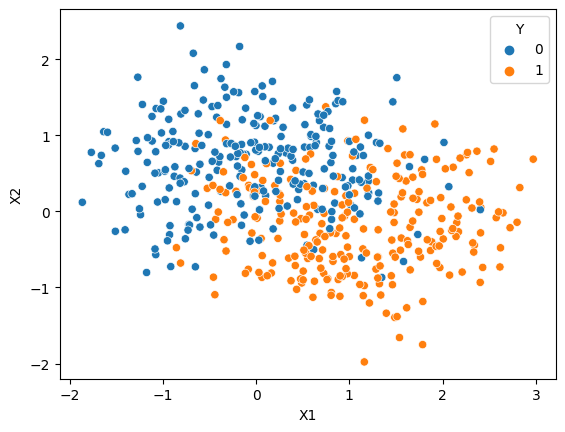

In [35]:
sns.scatterplot(x='X1' , y='X2' , hue='Y' , data=data)

In [36]:
x_a = data.iloc[:,:-1]

y_a = data['Y']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_a, y_a , test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)*100 , dt.score(X_test, y_test)*100

(100.0, 76.0)

# SVM

In [40]:
sv = SVC()
sv.fit(X_train, y_train)
sv.score(X_train, y_train)*100 , sv.score(X_test, y_test)*100

(82.25, 82.0)

# GaussianNB

In [41]:
gb = GaussianNB()
gb.fit(X_train, y_train)
gb.score(X_train, y_train)*100 , gb.score(X_test, y_test)*100

(80.75, 83.0)

# VotingClassifier

In [60]:
li = [('dt' , DecisionTreeClassifier() ) , ('svm' , SVC() ) , (('gnb') , GaussianNB())]

In [61]:
from sklearn.ensemble import VotingClassifier

C = VotingClassifier(li , weights=[10 , 5 , 8])

Voting.fit(X_train, y_train)

VotingClassifier(estimators=[('d1', DecisionTreeClassifier()), ('d2', SVC()),
                             ('d3', GaussianNB())],
                 weights=[10, 5, 8])

In [62]:
Voting.score(X_train, y_train)*100 , Voting.score(X_test,y_test)*100

(84.25, 83.0)

In [63]:
import pandas as pd
prd = {'dt':dt.predict(X_test) , 'svm':sv.predict(X_test) , 'gnb':gb.predict(X_test) , 'Voting':Voting.predict(X_test)}

pe = pd.DataFrame(prd)
pe

,dt,svm,gnb,Voting
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
95,0,1,1,1
96,1,1,1,1
97,1,0,0,0
98,1,1,1,1
